# Handwritten digits classification using neural network

## In this notebook we will classify handwritten digits using a Artificial neural network

In [3]:
#Import all important libraries which will be in use
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing dataset directly from keras.datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
# number of rows in training daataset
len(X_train)

60000

In [8]:
# number of rows in testing dataset
len(X_test)

10000

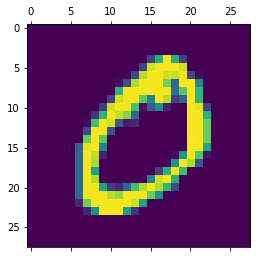

In [11]:
# using matplot library the image is showing of 28 x 28 pixels
plt.matshow(X_train[1])

In [10]:
X_test.shape

(10000, 28, 28)

The matrix is in the form of 28 x 28 pixels, but we cannot pass these arrays into our deep learning model. We have to convert it into 1d array 

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As, we can see that the values are ranges from 0-255, first we have to normalize it with the help of keras normalize function. 

In [13]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

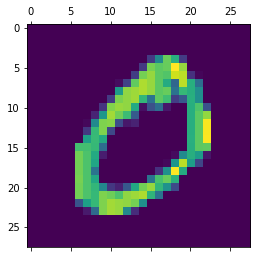

In [17]:
# Now if we see our image it will be different because of the normalization.
plt.matshow(X_train[1])

Coverting 2d array of 28 x 28 into 1d array of 784 by the help of keras layer

Now the training and testing datasets are ready, lets make a ANN model. 

In [19]:
model = tf.keras.models.Sequential()

In [20]:
# Adding a flattening layer
model.add(tf.keras.layers.Flatten())

In [22]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [23]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [24]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [25]:
# Compiling the ANN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Fitting the model with X_train and y_train
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2562 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1037 - accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.0712 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0405 - accuracy: 0.9862


In [28]:
# testing our model on the test data to find val loss and val accuracy
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 639us/step - loss: 0.0876 - accuracy: 0.9762
0.08755779266357422
0.9761999845504761


We can save our model into epic_num_reader file for any furthur use.

In [29]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [30]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Predicting the test dataset with our model

In [32]:
predictions = new_model.predict(X_test)

In [33]:
print(predictions)

[[1.7035250e-11 3.8551395e-11 7.1845783e-08 ... 9.9999988e-01
  4.7826938e-12 1.0768032e-09]
 [3.4426888e-09 9.6386269e-05 9.9979383e-01 ... 2.1989008e-08
  3.5823483e-10 1.7589427e-14]
 [5.3058775e-09 9.9990880e-01 7.2514320e-07 ... 4.4128625e-05
  4.3432789e-05 1.7980710e-07]
 ...
 [6.0324395e-10 1.4520006e-09 1.8331173e-10 ... 1.1027821e-05
  1.7190608e-07 9.6464191e-07]
 [2.5823850e-08 1.4754636e-10 1.2156214e-08 ... 4.8746269e-08
  9.2477057e-05 2.8305500e-10]
 [1.7493883e-09 1.0738051e-12 8.1814009e-12 ... 3.7814485e-14
  5.8983045e-09 1.6852429e-11]]


That sure doesn't start off as helpful, but recall these are probability distributions. We can get the actual number pretty simply

In [34]:
print(np.argmax(predictions[0]))

7


Now let's check it with the input to match that the number we predicted is actually 7 or not??

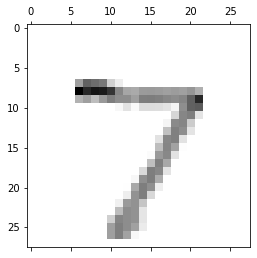

In [35]:
plt.matshow(X_test[0], cmap=plt.cm.binary)

Awesome! the number we predicted with our model and the input we have given are same. The Model is working perfectly.